In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Employee.csv")

In [4]:
print("First 5 rows of the dataset:")
df.head(5)

First 5 rows of the dataset:


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [5]:
print("\nMissing values (column-wise):")
print(df.isnull().sum())


Missing values (column-wise):
Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


In [7]:
print("\nStatistical Information:")
df.describe(include='all')


Statistical Information:


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653,4653.000000,4653,4653.000000,4653.000000,4653,4653,4653.000000,4653.000000
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN
freq,3601,NaN,2228,NaN,NaN,2778,4175,NaN,NaN
mean,NaN,2015.062970,NaN,2.698259,29.393295,NaN,NaN,2.905652,0.343864
std,NaN,1.863377,NaN,0.561435,4.826087,NaN,NaN,1.558240,0.475047
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.000000
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.000000
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.000000
75%,NaN,2017.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.000000


In [14]:
print("\nColumn Names and Data Types:")
df.dtypes


Column Names and Data Types:


Education                     object
JoiningYear                    int64
City                          object
PaymentTier                    int64
Age                            int64
Gender                        object
EverBenched                   object
ExperienceInCurrentDomain      int64
LeaveOrNot                     int64
zscore_JoiningYear           float64
dtype: object

In [10]:
print(f" \nDimensions of the dataset:{df.shape} (Rows, Columns)")

 
Dimensions of the dataset:(4653, 9) (Rows, Columns)


In [10]:
for col in df.columns:
    if df[col].dtype=='object':
        try:
            df[col]=pd.to_numeric(df[col])
        except:
            print(col," column is perfect text ")
    else:
        print(col," this column already in ",df[col].dtype)

# print("\nChecking and Converting Data Types:")
# for col in df.columns:
#     if df[col].dtype == 'object':
#         try:
#             df[col] = pd.to_numeric(df[col])
#             print(f"Converted {col} to numeric.")
#         except:
            
#             print(f"{col} remains as object (non-numeric text data).")
#     else:
#         print(f"{col} is already {df[col].dtype}")

Education  column is perfect text 
JoiningYear  this column already in  int64
City  column is perfect text 
PaymentTier  this column already in  int64
Age  this column already in  int64
Gender  column is perfect text 
EverBenched  column is perfect text 
ExperienceInCurrentDomain  this column already in  int64
LeaveOrNot  this column already in  int64


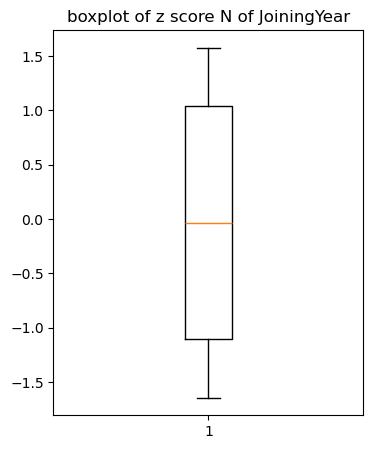

In [12]:
col_for_zscore='JoiningYear'
df['JoiningYear_z_score']=(df[col_for_zscore]-df[col_for_zscore].mean())/df[col_for_zscore].std()

plt.figure(figsize=(4,5))
plt.boxplot(x=df['JoiningYear_z_score'])
plt.title('boxplot of z score N of JoiningYear')
plt.show()

# col_to_normalize = 'JoiningYear'  
# df['zscore_' + col_to_normalize] = (df[col_to_normalize] - df[col_to_normalize].mean()) / df[col_to_normalize].std()

# print(f"\nZ-Score normalization done on column: {col_to_normalize}")
#     # Plotting Box Plot
# plt.figure(figsize=(5, 5))
# plt.boxplot(x=df['zscore_' + col_to_normalize])
# plt.title(f"Boxplot of Z-Score Normalized {col_to_normalize}")
# plt.show()



In [16]:
print("\nConverting Categorical Variables to Quantitative (One-Hot Encoding):")
cat_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Encoded DataFrame:")
print(df_encoded.head())


Converting Categorical Variables to Quantitative (One-Hot Encoding):
Encoded DataFrame:
   JoiningYear  PaymentTier  Age  ExperienceInCurrentDomain  LeaveOrNot  \
0         2017            3   34                          0           0   
1         2013            1   28                          3           1   
2         2014            3   38                          2           0   
3         2016            3   27                          5           1   
4         2017            3   24                          2           1   

   zscore_JoiningYear  Education_Masters  Education_PHD  City_New Delhi  \
0            1.039527              False          False           False   
1           -1.107114              False          False           False   
2           -0.570454              False          False            True   
3            0.502867               True          False           False   
4            1.039527               True          False           False   

   City_P